In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load raw data
df = pd.read_json('../data/fizzy.json', lines=True)

#start cleaning
df['actualCostEth'] = pd.to_numeric('0.' + df.actualCost.str.split(' ').str[0])
df['actualCostUsd'] = pd.to_numeric(df.actualCost.str.split(' ').str[2].str.slice(2,6,1))
df['blockHeight'] = pd.to_numeric(df.blockHeight)
df['gasLimit'] = pd.to_numeric(df.gasLimit)
df['gasPrice'] = pd.to_numeric('0.' + df.gasPrice.str.split(' ').str[0])
df['gasUsed'] = pd.to_numeric(df.gasUsed.str.split(' ').str[0])
df['timeStamp'] = df.timeStamp.str.extract('\((.*)\)')
df['timeStamp'] = pd.to_datetime(df.timeStamp, format='%b-%d-%Y %I:%M:%S %p +%Z')
df['inputData'] = df.inputData.str.replace('[\\r|\\n]', '')
df['functionCalled'] = df.inputData.str.extract('Function: (.*)\(')
df['flightId'] = df.inputData.str.extract('[addNewInsurance|updateFlightStatus|manualInsuranceResolution].*\[0\]:\s\s(.{64})')
df['flightNo'] = df.flightId.str.decode('hex') \
                            .str.decode('utf-8') \
                            .str.rsplit('.',n=1) \
                            .str.get(0) \
                            .str.replace('.','')
df['departureDate'] = pd.to_datetime(df.flightId.str.decode('hex') \
                                     .str.decode('utf-8') \
                                     .str.rsplit('.',n=1) \
                                     .str.get(1) \
                                     .str.slice(0,10,1), unit='s')
df['limitArrivalTime'] = df.inputData.str.extract('addNewInsurance.*\[1\]:\s\s(.{64})')
df['limitArrivalTime'] = pd.to_datetime(df.limitArrivalTime.str[-12:].apply(lambda x: None if pd.isnull(x) else int(str(x), 16)),unit='ms')
df['premium'] = df.inputData.str.extract('addNewInsurance.*\[2\]:\s\s(.{64})')
df['premium'] = df.premium.apply(lambda x: None if pd.isnull(x) else int(str(x), 16))
df['indemnity'] = df.inputData.str.extract('addNewInsurance.*\[3\]:\s\s(.{64})')
df['indemnity'] = df.indemnity.apply(lambda x: None if pd.isnull(x) else int(str(x), 16))
df['productId'] = df.inputData.str.extract('(?:addNewInsurance.*\[4\]:\s\s|manualInsuranceResolution.*\[2\]:\s\s)(.{64})')
df['actualArrivalTime'] = df.inputData.str.extract('updateFlightStatus.*\[1\]:\s\s(.{64})')
df['actualArrivalTime'] = pd.to_datetime(df.actualArrivalTime.str[-12:].apply(lambda x: None if pd.isnull(x) else int(str(x), 16)),unit='ms')
df['newStatusId'] = df.inputData.str.extract('manualInsuranceResolution.*\[1\]:\s\s(.{64})')
df.value = pd.to_numeric(df.value.str.slice(0,1,1))
del df['txReceiptStatus']
del df['inputData']
del df['actualCost']
df.head()

,blockHeight,fromAddress,gasLimit,gasPrice,gasUsed,nonce,timeStamp,txHash,value,actualCostEth,...,functionCalled,flightId,flightNo,departureDate,limitArrivalTime,premium,indemnity,productId,actualArrivalTime,newStatusId
0,6861211,0x50e00de2c5cc4e456cf234fcb1a0efa367ed016e,132061,9.000000e-09,120055,19564,2018-12-10 13:58:45,0xe053c29b2e6c7a72837088107ca5ccc76768085bf713...,0,0.001080,...,addNewInsurance,54472e3931312e31353435393535323030303030000000...,TG911,2018-12-28,2018-12-29 01:15:00,9.0,500.0,3532343631636432626430623466313938383664643033...,NaT,NaN
1,6861212,0x50e00de2c5cc4e456cf234fcb1a0efa367ed016e,132061,9.000000e-09,120055,19565,2018-12-10 13:59:04,0x62a5f72510f12583d13ac5cfd9cd19991f3521021c2e...,0,0.001080,...,addNewInsurance,54472e3931302e31353435303931323030303030000000...,TG910,2018-12-18,2018-12-19 08:20:00,12.0,500.0,3631393265613634626363633438623438643765643465...,NaT,NaN
2,6836388,0x50e00de2c5cc4e456cf234fcb1a0efa367ed016e,115561,9.000000e-09,105055,19548,2018-12-06 11:41:57,0x382809be94f8b8226bd787768dcb7f1056181bf8c81a...,0,0.000945,...,addNewInsurance,435a2e363036302e313534363733323830303030300000...,CZ6060,2019-01-06,2019-01-06 13:30:00,10.0,150.0,6365666561383064363263373434626138323764316537...,NaT,NaN
3,6839275,0x50e00de2c5cc4e456cf234fcb1a0efa367ed016e,38427,9.000000e-09,34934,19552,2018-12-06 23:06:44,0xdbac6eb83606989389b23dfe53405ff8152e2e8eb2f6...,0,0.000314,...,updateFlightStatus,4a4c2e382e313534343035343430303030300000000000...,JL8,2018-12-06,NaT,NaN,NaN,NaN,2018-12-06 22:56:00,NaN
4,6840920,0x50e00de2c5cc4e456cf234fcb1a0efa367ed016e,38639,9.000000e-09,35126,19553,2018-12-07 05:46:52,0x9c447fb74e779051e9f47576640cc95a0734ee6e7a20...,0,0.000316,...,updateFlightStatus,41462e3730332e31353434303534343030303030000000...,AF703,2018-12-06,NaT,NaN,NaN,NaN,2018-12-07 05:35:00,NaN


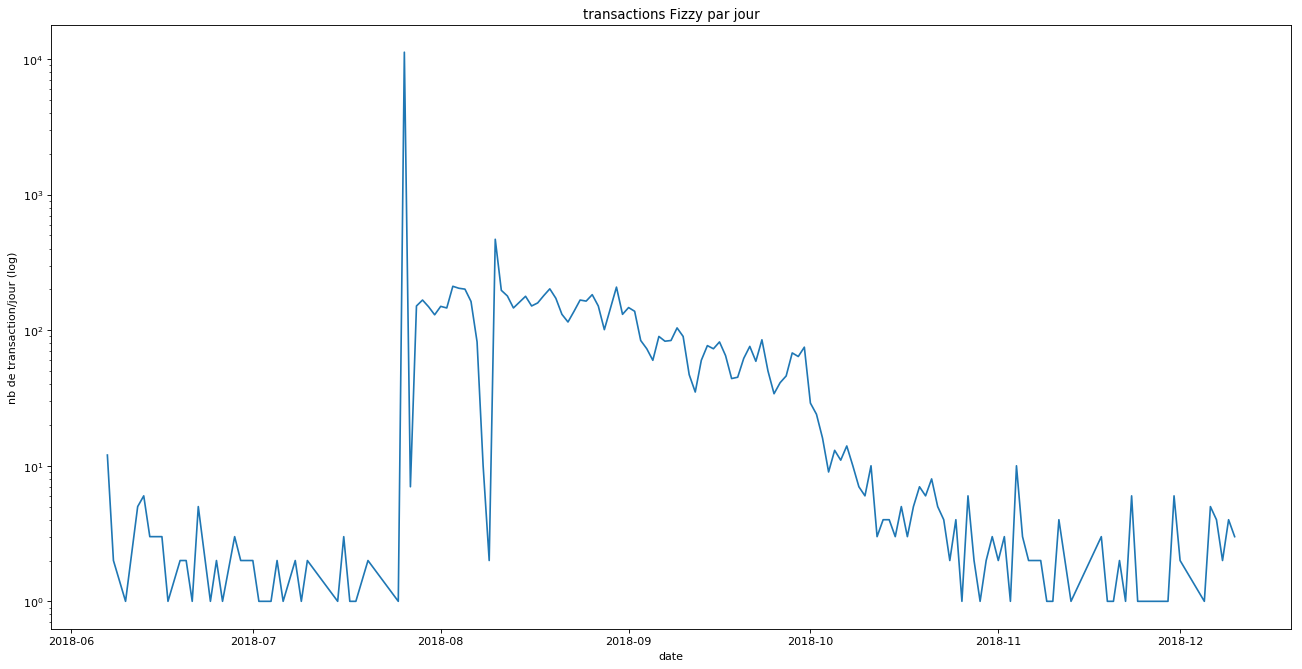

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

ts = df.timeStamp.groupby(df.timeStamp.dt.floor('d')).size().reset_index(name='count')
plt.plot(ts['timeStamp'], ts['count'])
plt.title("transactions Fizzy par jour")
plt.xlabel("date")
plt.ylabel("nb de transaction/jour (log)")
plt.yscale("log")


In [17]:
df.flightId

0        54472e3931312e31353435393535323030303030000000...
1        54472e3931302e31353435303931323030303030000000...
2        435a2e363036302e313534363733323830303030300000...
3        4a4c2e382e313534343035343430303030300000000000...
4        41462e3730332e31353434303534343030303030000000...
5        55322e373933332e313534333632323430303030300000...
6        435a2e3636312e31353436373332383030303030000000...
7        55322e323538362e313534383633333630303030300000...
8        435a2e363035392e313534353532333230303030300000...
9        55322e323538312e313534383436303830303030300000...
10       41462e313738312e313534343331333630303030300000...
11       50532e3330372e31353431383038303030303030000000...
12       415a2e3331332e31353434313430383030303030000000...
13       55412e3939302e31353431383038303030303030000000...
14       42412e323231342e313534343134303830303030300000...
15       41462e313038332e313534363231343430303030300000...
16       41462e363032302e313534313839343430303030300000.